<a href="https://colab.research.google.com/github/lovelyoyrmia/machine-learning-notebook/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [35]:
files.upload()

Saving newborn-g3c387ae8e_1920.jpg to newborn-g3c387ae8e_1920.jpg


{'newborn-g3c387ae8e_1920.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x05\x00\x07\x80\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xfe\x82

In [3]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [4]:
def scaleImg(image, scale_width):
    img_height, img_width, _ = image.shape
    new_height = int(scale_width / img_width * img_height)
    return cv2.resize(image, (scale_width, new_height))

In [78]:
logo = scaleImg(cv2.imread("watermark.png"), 800)
img = cv2.imread("newborn-g3c387ae8e_1920.jpg")

In [79]:
img.shape

(1280, 1920, 3)

In [80]:
logo.shape

(418, 800, 3)

In [81]:
h_img, w_img, _ = img.shape
h_logo, w_logo, _ = logo.shape

In [82]:
# ADDED NEW HEIGHT AND WIDTH
percent_of_scalling = 200
new_h = int(h_img * percent_of_scalling/100)
new_w = int(w_img * percent_of_scalling/100)
resized_img = cv2.resize(img, (new_w, new_h), interpolation=cv2.INTER_AREA)


logo_scale = 200
logo_h = int(h_logo * logo_scale/100)
logo_w = int(w_logo * logo_scale/100)
resized_logo = cv2.resize(logo, (logo_w, logo_h), interpolation=cv2.INTER_AREA)


In [83]:
# Get Center Image
image_h, image_w, _ = resized_img.shape

center_y = int(image_h / 2)
center_x = int(image_w / 2)

wm_h, wm_w, _ = resized_logo.shape
# Get top, left, right, bottom
top_y = center_y - int(wm_h / 2)
left_x = center_x - int(wm_w / 2)
bottom_y = top_y + wm_h
right_x = left_x + wm_w

In [84]:
# Get ROI
roi = resized_img[top_y:bottom_y, left_x:right_x]

In [85]:
roi.shape

(836, 1600, 3)

In [86]:
resized_logo.shape

(836, 1600, 3)

In [87]:
result = cv2.addWeighted(roi, 1, resized_logo, 0.3, 0)
resized_img[top_y:bottom_y, left_x:right_x] = result

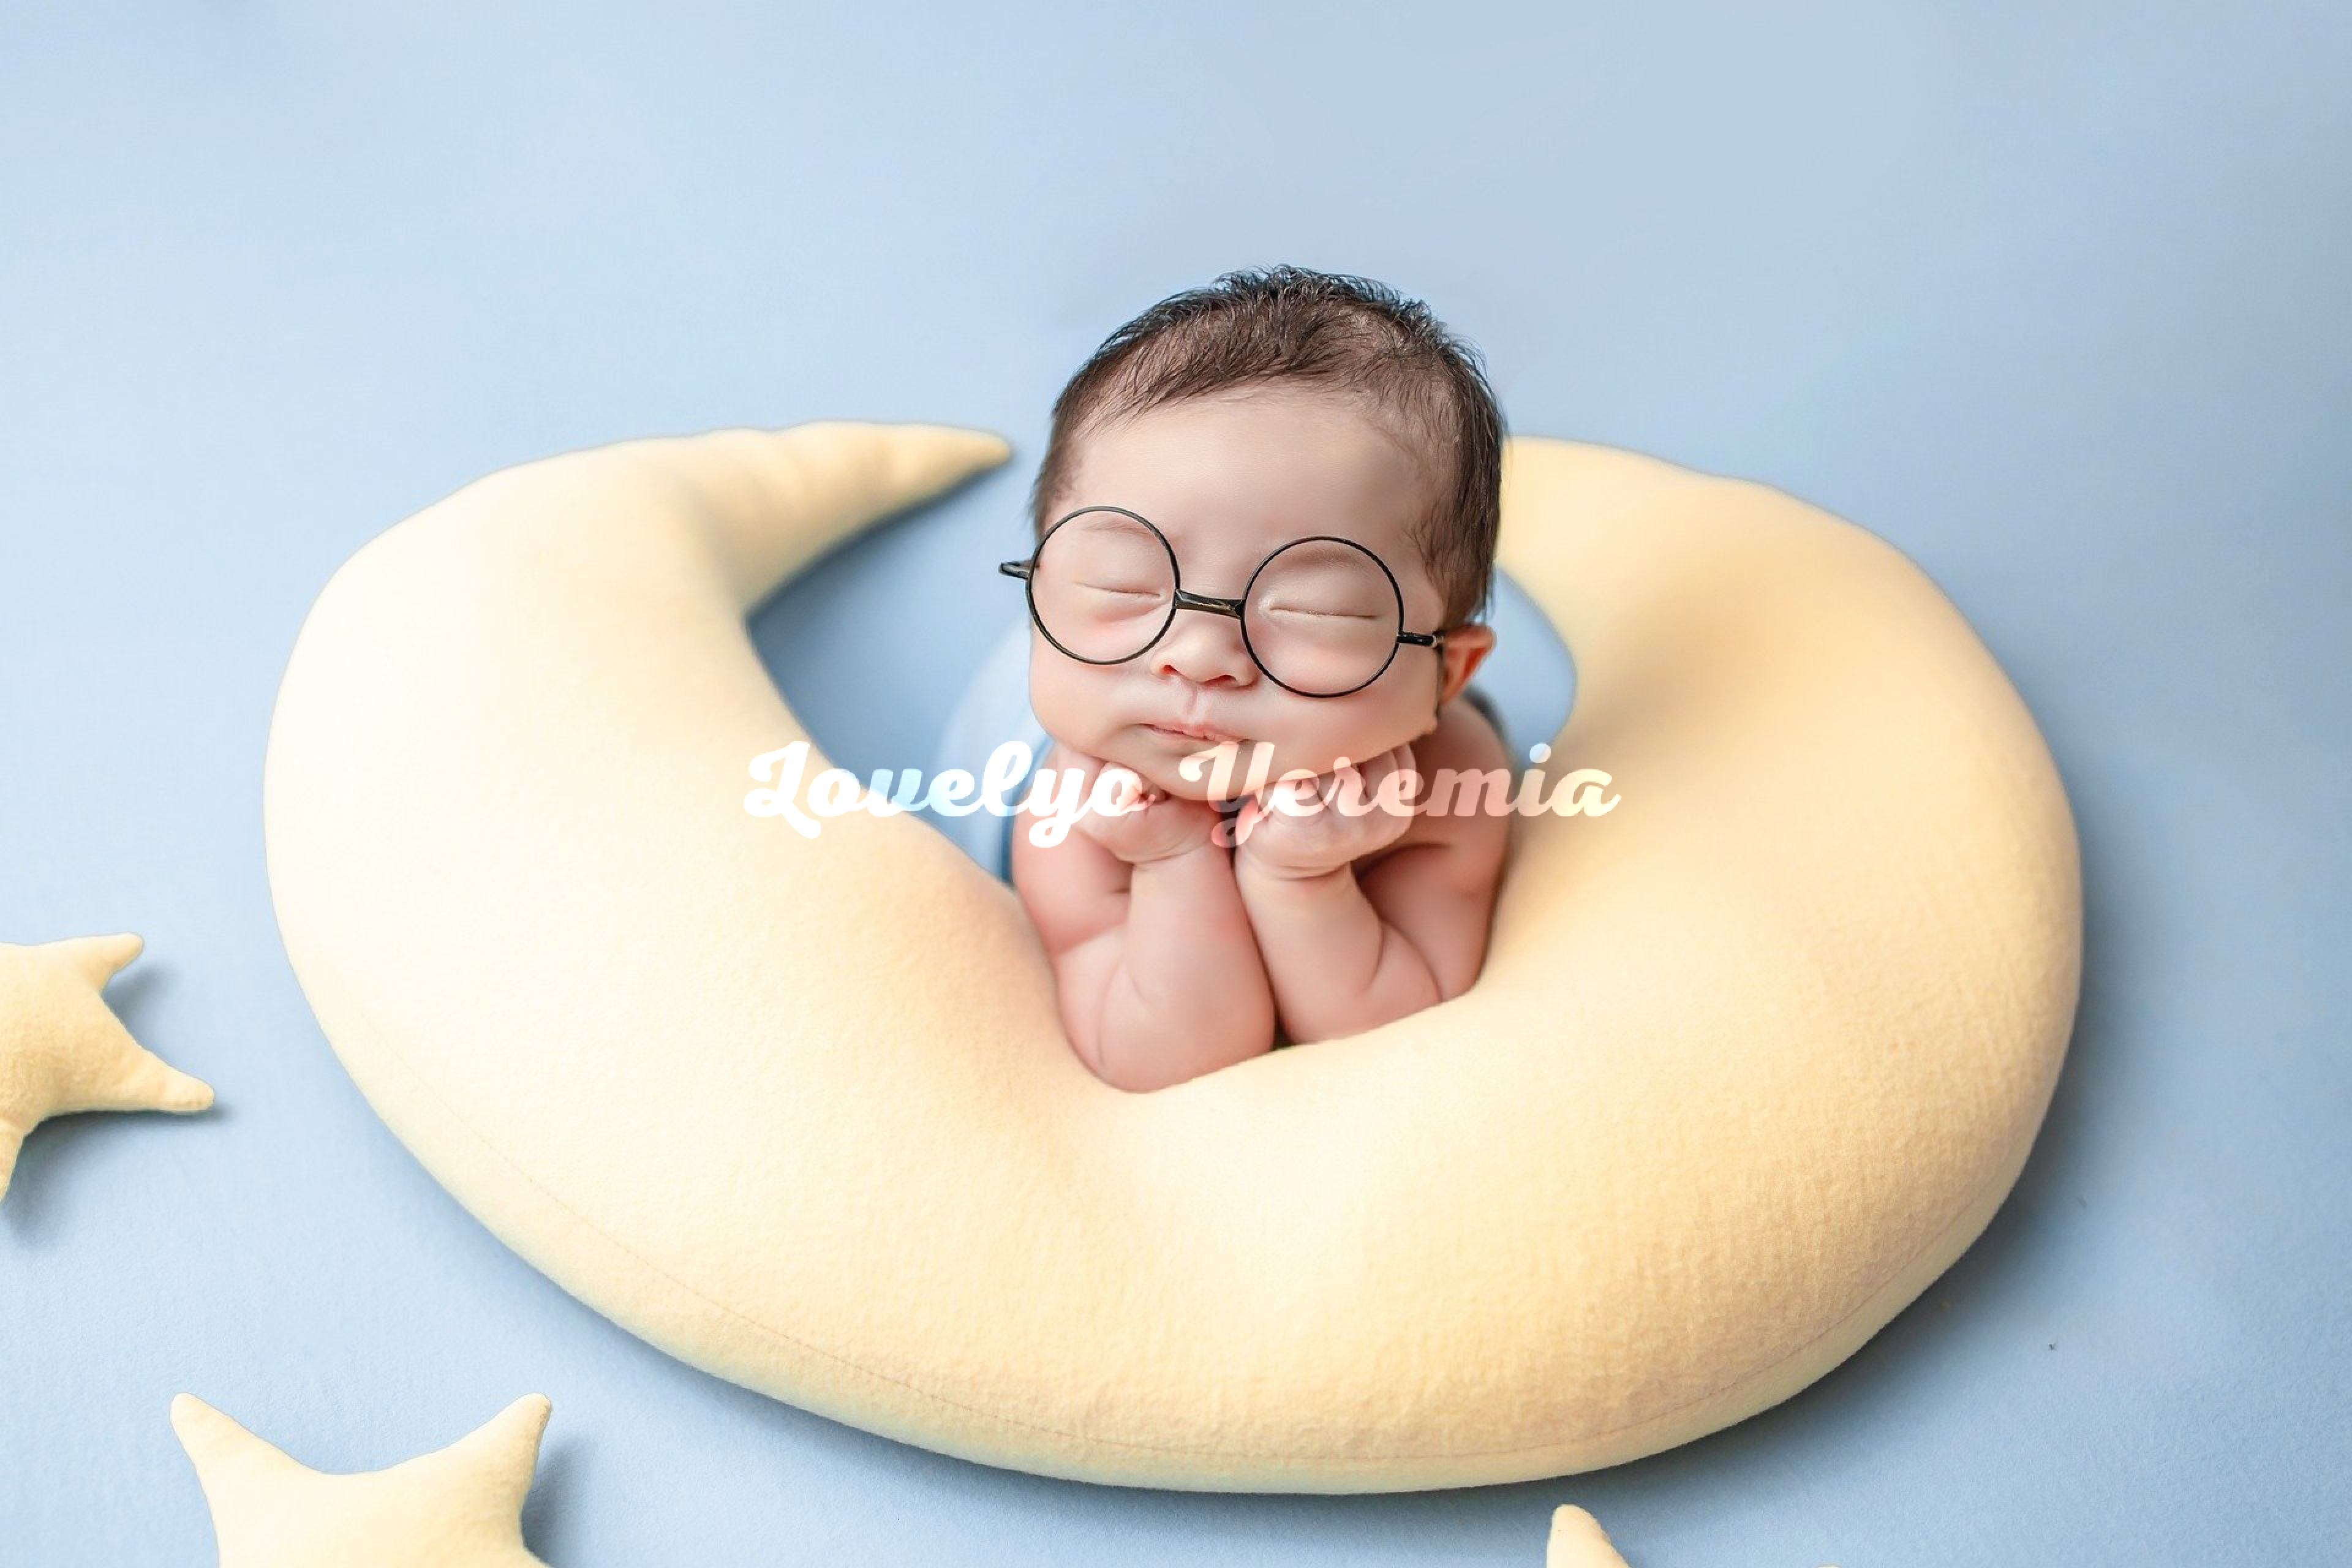

In [88]:
cv2_imshow(resized_img)

In [89]:
h_img, w_img, _ = img.shape
h_logo, w_logo, _ = logo.shape

center_y = int(h_img / 2)
center_x = int(w_img / 2)

top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

roi = img[top_y:bottom_y, left_x:right_x]
result = cv2.addWeighted(roi, 1, logo, 0.3, 0)
img[top_y:bottom_y, left_x:right_x] = result

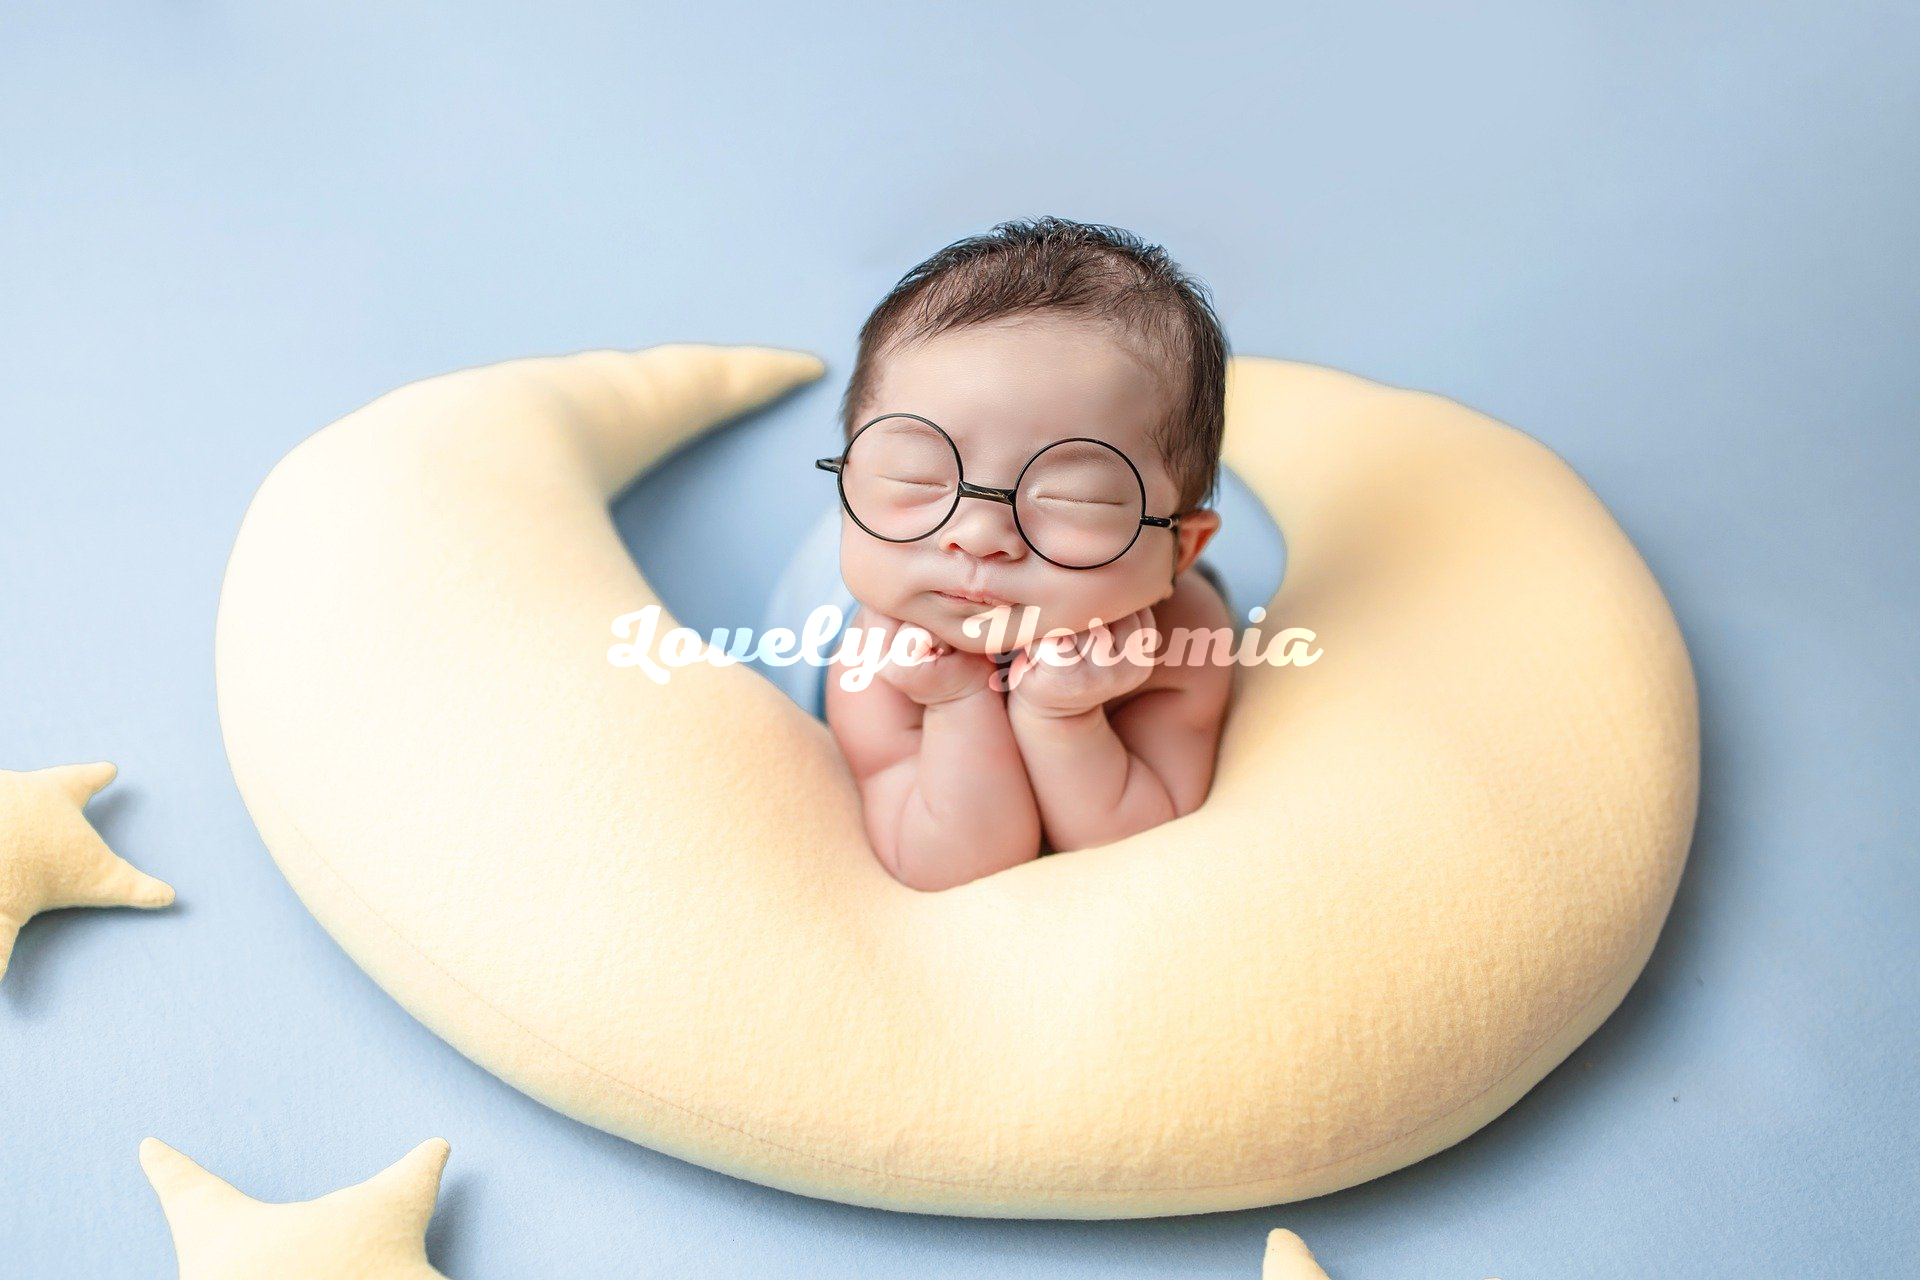

In [90]:
cv2_imshow(img)

In [91]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Image to gray
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [92]:
new_image = face_cascade.detectMultiScale(gray_image, 1.2, 4)

error: ignored

In [ ]:
sub_face = None
if len(new_image) != 0:
    for x, y, w, h in new_image: 
      cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
      # sub_face = img[y:y+h, x:x+w]
      # sub_face = cv2.GaussianBlur(sub_face, (23, 23), 30)
      # subface = img[y:y+sub_face.shape[0], x:x+sub_face.shape[1]]
      # cv2.imwrite('test.jpg', sub_face)

cv2_imshow(img)

In [ ]:
print(img.shape)

In [ ]:
resized = cv2.resize(img, (500, 700))
cv2_imshow(resized)


In [ ]:
for x, y, w, h in new_image:
  print(x, y, w, h)